In [1]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

Read in data

In [45]:
results = pd.read_csv('experiment_nonlin_1_t_sep_results.csv')
wish_results = pd.read_csv('wishart_experiment_1_t_sep_results.csv')
wish_results = pd.read_csv('wishart_experiment_3_t_sep_results.csv')

Import KME results in correct format and extract true positive and false positive rates.

In [37]:
results_mean = results.groupby(['b','d','KME','E','K','n_samples','n_distributions']).mean()
results_mean.insert(1, 'acc_std', results.groupby(['b','d','KME','E','K','n_samples','n_distributions'])[['score']].std())

true_pos = results_mean['truepos'] / (results_mean['truepos'] + results_mean['falseneg'])
false_pos = results_mean['falsepos'] / (results_mean['falsepos'] + results_mean['trueneg'])

#print(results_mean.reset_index().to_markdown())

In [46]:
wish_results

,linear,b,d,nsamples,accuracy,trueneg,falseneg,truepos,falsepos
0,False,0.01,0.01,50,0.333333,0,0,1,2
1,False,0.01,0.01,50,0.333333,0,0,1,2
2,False,0.01,0.01,50,0.333333,0,0,1,2
3,False,0.01,0.01,50,0.333333,0,0,1,2
4,False,0.01,0.01,50,0.333333,0,0,1,2
...,...,...,...,...,...,...,...,...,...
2795,True,0.05,0.00,1000,0.333333,0,0,1,2
2796,True,0.05,0.00,1000,0.333333,0,0,1,2
2797,True,0.05,0.00,1000,0.333333,0,0,1,2
2798,True,0.05,0.00,1000,0.333333,0,0,1,2


Import Wishart results in correct format and extract true positive and false positive rates.

In [40]:
wish_results_lin = wish_results[wish_results['linear'] == True] 
wish_results_nonlin = wish_results[wish_results['linear'] == False] 

wish_results_lin_mean = wish_results_lin.groupby(['b','d','nsamples']).mean()
wish_results_lin_mean.insert(2, 'acc_std', wish_results_lin.groupby(['b','d','nsamples'])[['accuracy']].std())
wish_results_nonlin_mean = wish_results_nonlin.groupby(['b','d','nsamples']).mean()
wish_results_nonlin_mean.insert(2, 'acc_std', wish_results_nonlin.groupby(['b','d','nsamples'])[['accuracy']].std())

true_pos_wish_lin = wish_results_lin_mean['truepos'] / (wish_results_lin_mean['truepos'] + wish_results_lin_mean['falseneg'])
false_pos_wish_lin = wish_results_lin_mean['falsepos'] / (wish_results_lin_mean['falsepos'] + wish_results_lin_mean['trueneg'])
true_pos_wish_nonlin = wish_results_nonlin_mean['truepos'] / (wish_results_nonlin_mean['truepos'] + wish_results_nonlin_mean['falseneg'])
false_pos_wish_nonlin = wish_results_nonlin_mean['falsepos'] / (wish_results_nonlin_mean['falsepos'] + wish_results_nonlin_mean['trueneg'])


### Graph displaying the True Positive Rate and False Positive Rate of the KME and Wishart test with different hyperparameters

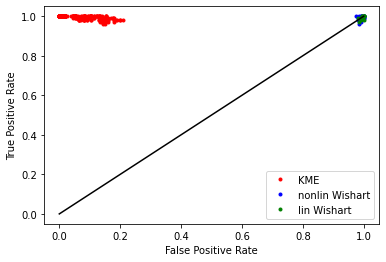

In [41]:
plt.plot(false_pos,true_pos, 'r.',label='KME')    
plt.plot(false_pos_wish_nonlin, true_pos_wish_nonlin, 'b.',label='nonlin Wishart')
plt.plot(false_pos_wish_lin,true_pos_wish_lin,'g.', label='lin Wishart')
plt.plot([0,1],'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()